# Introduction

This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.


**Data sources:**

`profiles.csv` was provided by Codecademy.com.

## Scoping

It's beneficial to create a project scope whenever a new project is being started. Below are four sections to help guide the project process and progress. The first section is the project goals, a section to define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and aligning the question(s) with the project goals. Lastly, evaluation will help build conclusions and findings from the analysis.

### Project Goals

In this project, the goal is to utilize the skills learned and apply machine learning techniques to a data set. The primary research question that will be answered is whether an OkCupid's user astrological sign can be predicted using other variables from their profiles. This project is important since many users find astrological signs an important part of matches, and if users don't input their sign, OkCupid would like to predict which sign they might be. 


### Data

The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented. 

### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores. 


## Import Python Modules

First import the modules being used for this project:

In [5]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
#This will change the renderer to a version that uses the Plotly JS code directly and in online mode.
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# MAchine learning library to split train and test, classification models and evaluating scores. 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Loading the Data

To analyze the user profiles from OkCupid, pandas will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python.

Here `profiles.csv` is loaded into a `DataFrame` called `profiles`. The `DataFrame` is then briefly examined using `.head()` to check the contents.


In [6]:
profiles = pd.read_csv('profiles.csv')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


#### Data Characteristics

`profiles` has 59,946 rows and 31 columns, this is a good sign since there seems to be enough data for machine learning. 

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…


In [7]:
list(profiles.columns) 
profiles.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

## Explore the Data

In order to get insight from the data and after knowing the missing values that could be valuable for the user and therefore for the company, I think that a good idea could be predicting the drink habits and the job position and suggesting the user to choose from our prediction.  Lets explore those features to see if I can work with those values.

In [8]:
print("number of categories:",profiles.drinks.nunique())
print("categories:", profiles.drinks.unique())

number of categories: 6
categories: ['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']


#### Clean labels

It is important that we clean the labels since this is what will be predicted and 48 predictions would be quite difficult. By taking the first word of the column, the signs and religion can be saved without the qualifiers. The qualifiers could be used for another problem down the line.

In [9]:
profiles["sign"] = profiles["sign"].str.split().str.get(0)
profiles["religion"] = profiles.religion.str.split().str.get(0)

## Continous Variables

#### age

The next plot shows the distribution of age in the group. It seems that most users are in their late 20s to early 30s.

In [10]:
fig = px.histogram(profiles, x="age")
fig.show()

Here is the same chart but broken down by gender. It seems that there are proportionally similar break down of gender by age, but slightly fewer females overall. 

In [11]:
fig = px.histogram(profiles, x="age", color="sex", barmode="overlay")
fig.show()

#### Height

The next plot shows the height variable, most people look like they are between 5 feet tall and 6.5 feet tall.

In [12]:
fig = px.histogram(profiles, x="height")
fig.show()

Here is the same height chart showing the break down by gender. It seems obvious, but females tend to be shorter than males and looks to have a normal distribution. 

In [13]:
fig = px.histogram(profiles, x="height", color="sex", barmode="overlay")
fig.show()

#### Income

Here is the data of income, it seems that the majority of the participants do not include their income figures.

In [14]:
fig = px.histogram(profiles, x="income", color="sex", barmode="overlay")
fig.show()

### Discrete Variables

#### Sex

Previously it was identified that there are more males in the data, and it seems that there are ~35,000 men to ~25,000 women.

In [15]:
sex_count = profiles.groupby(by=["sex"]).size().reset_index(name="counts")
px.bar(data_frame=sex_count, x="counts", y="sex", color="sex", barmode="group")

#### Body Type

The next chart shows the body type variable, and it seems that most users will describe themselves as average, fit, or athletic.

In [16]:
body_count = profiles.groupby(by=["body_type"]).size().reset_index(name="counts")
fig = px.bar(data_frame=body_count, x="counts", y="body_type", barmode="group", color="body_type", color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_traces(width=1)

The next chart shows the break down of body type by gender and it seems that some of the body type descriptions are highly gendered. For example "curvy" and "full figured" are highly female descriptions, while males use "a little extra", and "overweight" more often.

In [17]:
body_count_s = profiles.groupby(by=["body_type", "sex"]).size().reset_index(name="counts")
px.bar(data_frame=body_count_s, x="counts", y="body_type", color="sex", barmode="group")

#### Diet

Here is a chart of the dietary information for users. Most user eat "mostly anything", followed by "anything", and "strictly anything", being open-minded seems to be a popular signal to potential partners. 

In [18]:
diet_count = profiles.groupby(by=["diet"]).size().reset_index(name="counts")
px.bar(data_frame=diet_count, x="counts", y="diet", color="counts", barmode="group")

#### Drinks

The next plot shows that the majority of the users drink "socially", then "rarely" and "often". 

In [19]:
drinks_count = profiles.groupby(by=["drinks"]).size().reset_index(name="counts")
px.bar(data_frame=drinks_count, x="counts", y="drinks", color="counts", barmode="group")

#### Drugs

The vast majority of users "never" use drugs. 

In [20]:
drugs_count = profiles.groupby(by=["drugs"]).size().reset_index(name="counts")
px.bar(data_frame=drugs_count, x="counts", y="drugs", color="counts", barmode="group")

#### Education

Below you can see the majority of users are graduate from college/university followed by masters programs and those working on college/university. Interestingly space camp related options are fairly a popular options.

In [21]:
education_count = profiles.groupby(by=["education"]).size().reset_index(name="counts")
fig = px.bar(data_frame=education_count, x="counts", y="education", color="education", barmode="group")
fig.update_traces(width=1)

#### Jobs

Most users don't fit into the categories provided, but there are a fair share of students, artists, tech, and business folks. 

In [22]:
jobs_count = profiles.groupby(by=["job"]).size().reset_index(name="counts")
fig = px.bar(data_frame=jobs_count, x="counts", y="job", color="job", barmode="group")
fig.update_traces(width=1)

#### Offspring

The data suggest that most users do not have kids. 

In [23]:
offspring_count = profiles.groupby(by=["offspring"]).size().reset_index(name="counts")
fig = px.bar(data_frame=offspring_count, x="counts", y="offspring", color="offspring", barmode="group")
fig.update_traces(width=1)

#### Orientation

The majority of users are straight.

In [24]:
orientation_count = profiles.groupby(by=["orientation"]).size().reset_index(name="counts")
px.bar(data_frame=orientation_count, x="counts", y="orientation", color="orientation", barmode="group")

interestingly the majority of bisexual users re female. 

In [25]:
orientation_sex_count = profiles.groupby(by=["orientation", "sex"]).size().reset_index(name="counts")
px.bar(data_frame=orientation_sex_count, x="counts", y="orientation", color="sex", barmode="group")

#### Pets

The chart shows that most users like or has dogs.

In [26]:
pets_count = profiles.groupby(by=["pets"]).size().reset_index(name="counts")
fig = px.bar(data_frame=pets_count, x="counts", y="pets", color="pets", barmode="group")
fig.update_traces(width=1)

#### Religion

Religion was similar to sign where there are a lot of qualifiers and was cleaned to take the first word and distilled down to 9 groups. The majority was not very religious identifying as agnostic, other, or atheists. 

In [27]:
religion_count = profiles.groupby(by=["religion"]).size().reset_index(name="counts")
fig = px.bar(data_frame=religion_count, x="counts", y="religion", color="religion", barmode="group")
fig.update_traces(width=1)

#### Signs

Here are the astrological signs of the users. There are mainly evenly distributed with Capricorns being the rarest and Leos being the most common.

In [28]:
sign_count = profiles.groupby(by="sign").size().reset_index(name="counts")
px.bar(data_frame=sign_count, x="counts", y="sign", color="sign")

#### Smoking

Similarly for drugs the majority of users chose "no" for smoking.

In [29]:
smoking_count = profiles.groupby(by="smokes").size().reset_index(name="counts")
px.bar(data_frame=smoking_count, x="counts", y="smokes", color="smokes")

#### Status

The relationship status for a dating website is fairly predictable. One would assume that most people are single and available which is reflected in the data.

In [30]:
status_count = profiles.groupby(by="status").size().reset_index(name="counts")
px.bar(data_frame=status_count, x="counts", y="status", color="status")

### Data Preperation


#### Missing Data

Missing data is often not handled by machine learning algorithms well and have to be checked so they may need to be imputed or removed. It seems that many of the columns do have missing values. 

In [31]:
profiles.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

#### Preprocessing 

Preparing the data for modeling is important since it can speed up the process and produce better models. As the adage goes, "garbage in garbage out" so we want to make sure the data we are imputing into our modelling step is good enough to share with others.

The data for the model is going to be a subset of the variables. The variables were selected because they might be a good predictor for drinking habits, where some of the variables that were not selected such as `height` is probably not a good indicator. 

Here na values are dropped to create a fully complete data set. 

In [48]:
cols = ["location", 'body_type', 'diet', 'education', 'ethnicity', 'religion',
       'sex', 'smokes', 'job', "age", "drinks"]
df = profiles[cols].dropna()
df.shape
df.head()

,location,body_type,diet,education,ethnicity,religion,sex,smokes,job,age,drinks
0,"south san francisco, california",a little extra,strictly anything,working on college/university,"asian, white",agnosticism,m,sometimes,transportation,22,socially
1,"oakland, california",average,mostly other,working on space camp,white,agnosticism,m,no,hospitality / travel,35,often
5,"san francisco, california",average,mostly anything,graduated from college/university,white,atheism,m,no,computer / hardware / software,29,socially
7,"san francisco, california",average,mostly anything,graduated from college/university,white,christianity,f,no,artistic / musical / writer,31,socially
9,"san mateo, california",athletic,mostly anything,working on two-year college,white,atheism,m,no,student,37,not at all


#### One Class to:

- **Labels Encoding:**    
Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning. In label encoding, we replace the categorical value with a numeric value between 0 and the number of classes minus 1. 
- **Label Imbalance :**    
An imbalance in the prediction label needs to be checked. This is important since it's a multi-class problem where two or more outcomes can be had. An imbalance in a response variable is bad since it means that some labels only occur a few times. This is an issue for machine learning algorithms if there are not enough data to train with which will give bad predictions.   
In the given dataset, we observe that the counts of some drinks labels are less equal (i.e., with large deviations). Hence, we do have to worry about imbalances and try to address this problem.

- **Splitting Data:**    
Next the data needs to be split into train and validation sets. In this split 25% of the data is reserved for the final validation, while 75% is kept for training the model. 
- **Model building:**     
Now it's time to create some models, here is a list of [Multi class models](https://scikit-learn.org/stable/modules/multiclass.html) available in scikit learn. For this project three common algorithms will be used to make predictions.

In [49]:

class all_df_balanced():
    def __init__(self, df, percentage, class_drinks, total_class_drinks, cols):
        self.df = df
        self.percentage = percentage
        self.class_drinks = class_drinks
        self.total_class_drinks = total_class_drinks
        self.cols = cols
# Labels Encoding
    def encoder(df, cols):
        le_list = []
        le_tr = []
        df_encoded = pd.DataFrame()
        for i in range(len(cols)):
            le_list.append(preprocessing.LabelEncoder())
            le_tr.append(le_list[i].fit_transform(df[cols[i]]))
            df_encoded[cols[i]] = le_tr[i]
        return df_encoded
# Label Balance
    def index_random(df, percentage, class_drinks):
        df = all_df_balanced.encoder(df, cols)
        series_targets = df["drinks"].value_counts(normalize=True) 
        class_drinks_percentage = series_targets[class_drinks]
        df = df.loc[df.drinks == class_drinks]
        list_indx = df.index.values.tolist()
        np.random.seed(1)
        new_indx = np.random.choice(list_indx, replace=True, size = int(len(df)*percentage/class_drinks_percentage))
        df_out = df.loc[new_indx]
        return df_out
    
    def all_dfs(df, percentage, total_class_drinks):
        list_df = []
        for i in range(0,total_class_drinks,1):
            class_drinks = i
            list_df.append(all_df_balanced.index_random(df, percentage, class_drinks))
        df_balanced = pd.concat(list_df, join="inner")
        df_out = df_balanced.sample(frac = 1)
        #the labels are the target to test the features with.
        features = df_out.iloc[:,0:-1]
        drinks_labels = df_out.iloc[:,-1:]

        #Split the data into chunks
        X_train, X_test, y_train, y_test = train_test_split(features, drinks_labels, test_size=0.25, random_state = 42)
        models = [LogisticRegression(multi_class="multinomial"), KNeighborsClassifier(), RandomForestClassifier()]

        # Model building
        plt.figure(figsize=(25, 7))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle("Confusion Matrix", fontsize=18, y=0.95)
        for n, model in enumerate(models):
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            cm = confusion_matrix(y_test, y_pred)
            model_labels = ['socially', 'often', 'not at all', 'rarely', 'very often',
       'desperately']
            ax = plt.subplot(1, 3, n + 1)
            sns.heatmap(cm, annot=True, ax = ax, fmt="d");
            # labels, title and ticks
            ax.set_xlabel('Predicted labels');
            ax.set_ylabel('True labels'); 
            ax.set_title([model, "F1 Score= ",f1_score(y_test, y_pred, average='weighted')]);
            ax.yaxis.set_tick_params(rotation=360)
            ax.xaxis.set_tick_params(rotation=90)
            ax.xaxis.set_ticklabels(model_labels);
            ax.yaxis.set_ticklabels(model_labels);
        plt.show()
        
        

#### Evaluation Metrics

In the models, there will be several values that can be evaluated below is a quick diagram:
![](https://miro.medium.com/max/1400/1*UVP_xb4F6J-M-xH3haz5Jw.png)
here is a quick description of the metrics:

- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict. 

Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis. Since the diagonals are lighter in color and have higher numbers, the accuracy is going to be high since those are the True Positives.

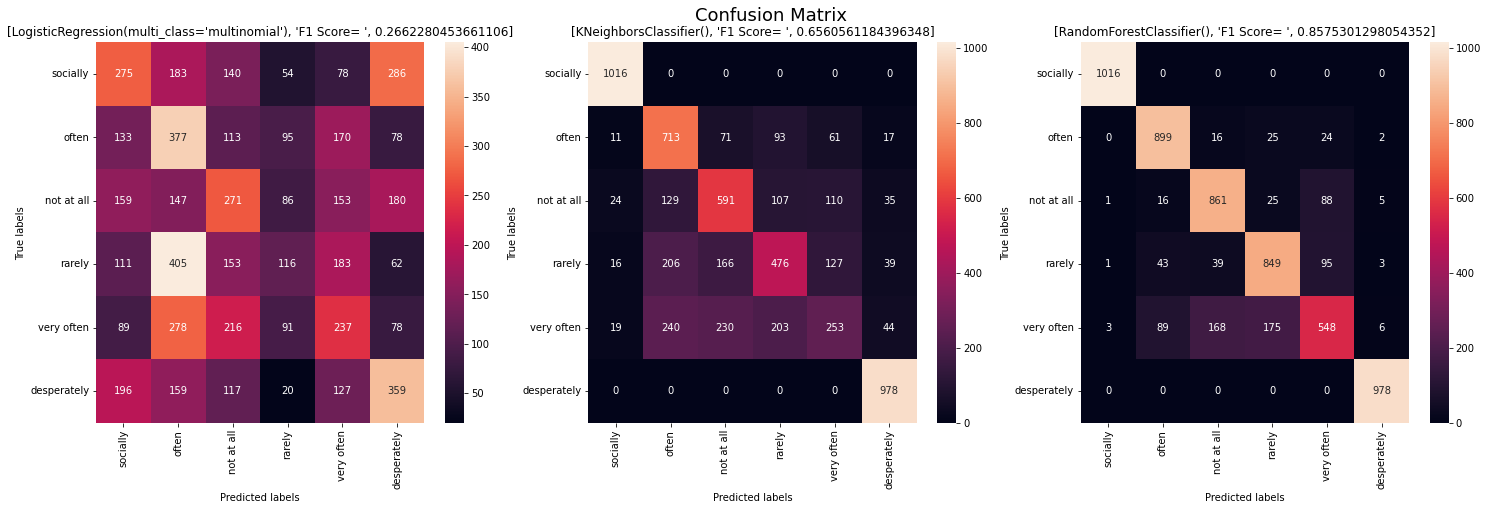

In [50]:
all_df_balanced.all_dfs(df=df, percentage=0.20, total_class_drinks=6)

### Evaluate the score

- **Logistic Regression:**    
The first model is using logistic regression with the `multi_class="multinomial"` argument. Using `model` predictions are created from the training dataset which is used to figure out how well the model preformed.
The final accuracy of the logistic regression model is 26% which is not good considering a random guess should result in being correct ~16% of the time (1/6).
- **K Nearest Neighbor:**    
The next models is the `KNeighborsClassifier` which will take 20 of it's neighbors to predict the drink habits. The default value for `n_neighbors` is 5 which was kept. This number can be tuned later on if needed. This model had a 65% accuracy which is a good sign.
- **Random Forest:**    
The last model is the Random Forest, the default `max_depth` is `none` which means that it will "If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.". The results are very promising because it has a 85% accuracy with this model.

#### Final Model

So it seems that the `Random Forest Model` might be the best model for OkCupid to use when users don't have their drink habit listed on their user profile. By using the hold out or validation set, we get ~85% accuracy which is very good. 
In the confusion matrix, it becomes clear that "Socially", "Desperately", "Often", and "Not at all" were predicted most often, and the least accurate predictions were between "not at all", "rarely", "very often" since the vertical color band represents even distributed guesses mostly correct and some wrong. 

### Conclusion

#### General Comments

In this project machine learning was used to predict the drinking habits of OkCupid users. This is an important feature since some people likes a lot going out and party and others prefer doing sports or cultural activities, so it would be better if this matches between compatible users. If users don't input their drinking habits, an algorithmic solution could have generated a habit to impute missing data when making matches.

#### Next Steps 

Next steps will be to add additional models or tune the hyper parameters of the used models to see if any more predictive power could be squeezed out of the algorithms. 